In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
%cd /content/drive/MyDrive/Signal and Image Processing With Python/Section16_Geometric_Operations

/content/drive/MyDrive/Signal and Image Processing With Python/Section16_Geometric_Operations


In [59]:
img = cv2.imread('Tiger.jpg')

In [60]:
print(type(img))
print(" ")
print(img.dtype)
print(" ")
print(img.shape)

<class 'numpy.ndarray'>
 
uint8
 
(480, 640, 3)


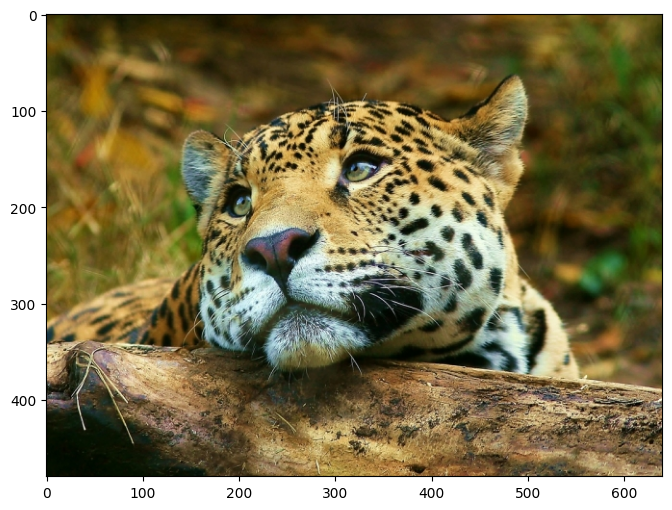

In [61]:
plt.figure(figsize=(12,6))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Translation

### Translation means to shift the position of an image toward right or left.

### The following line of code is used for translation

### cv2.warpAffine(img, T, (width, height))



In [62]:
height, width, channels = img.shape

In [63]:
print(height)
print(width)
print(channels)

480
640
3


In [64]:
Ty = height/4
Tx = width/4

In [65]:
T = np.float32([[1, 0, Tx], [0, 1, Ty]])

In [66]:
print(T)

[[  1.   0. 160.]
 [  0.   1. 120.]]


In [67]:
img_Translated = cv2.warpAffine(img, T, (width, height))

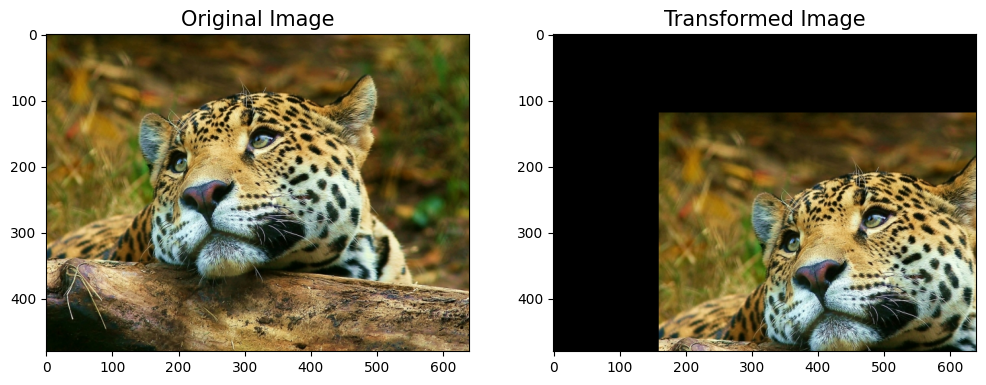

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_Translated)
plt.title('Transformed Image', fontsize = 15)
plt.show()

# Rotation

In [69]:
# Divide width and height by two to rototate the image around its centre
R = cv2.getRotationMatrix2D(center = (width/2, height/2), angle = 90, scale = 1)

In [70]:
# Rotated image can be obtained by following line of code
img_Rotated = cv2.warpAffine(img, R, (width, height))

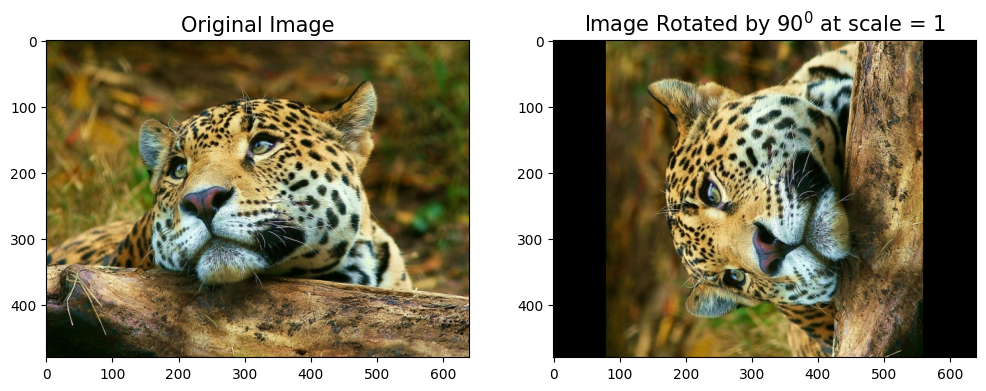

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_Rotated)
plt.title("Image Rotated by $90^0$ at scale = 1", fontsize = 15)
plt.show()


In [72]:
# Divide width and height by two to rototate the image around its centre
R = cv2.getRotationMatrix2D(center = (width/2, height/2), angle = 90, scale = 2)

# Rotated image can be obtained by following line of code
img_Rotated_2 = cv2.warpAffine(img, R, (width, height))

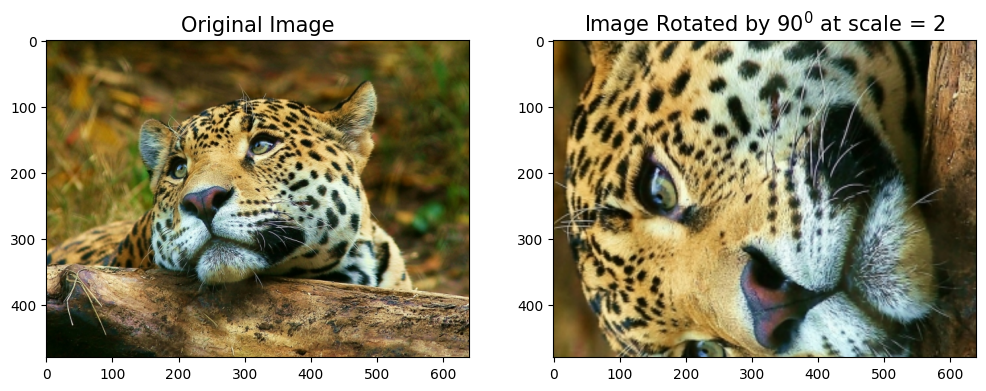

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_Rotated_2)
plt.title("Image Rotated by $90^0$ at scale = 2", fontsize = 15)
plt.show()


# Affine Transformation

In [74]:
board = cv2.imread('board.png')

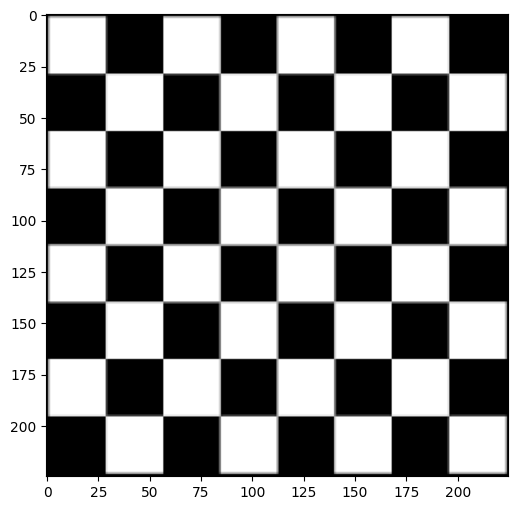

In [75]:
plt.figure(figsize=(12,6))
plt.imshow(board)
plt.show()

In [76]:
height, width, channels = board.shape
print(height)
print(width)
print(channels)

225
225
3


In [77]:
pt_01 = np.float32([[50,50],[200,50],[50,200]])
pt_02 = np.float32([[10,100],[200,50],[100,220]])

In [78]:
print(pt_01)
print(' ')
print(pt_02)

[[ 50.  50.]
 [200.  50.]
 [ 50. 200.]]
 
[[ 10. 100.]
 [200.  50.]
 [100. 220.]]


In [79]:
Affine_Matrix = cv2.getAffineTransform(pt_01, pt_02)

In [80]:
transformed_Image = cv2.warpAffine(board , Affine_Matrix, (width, height))

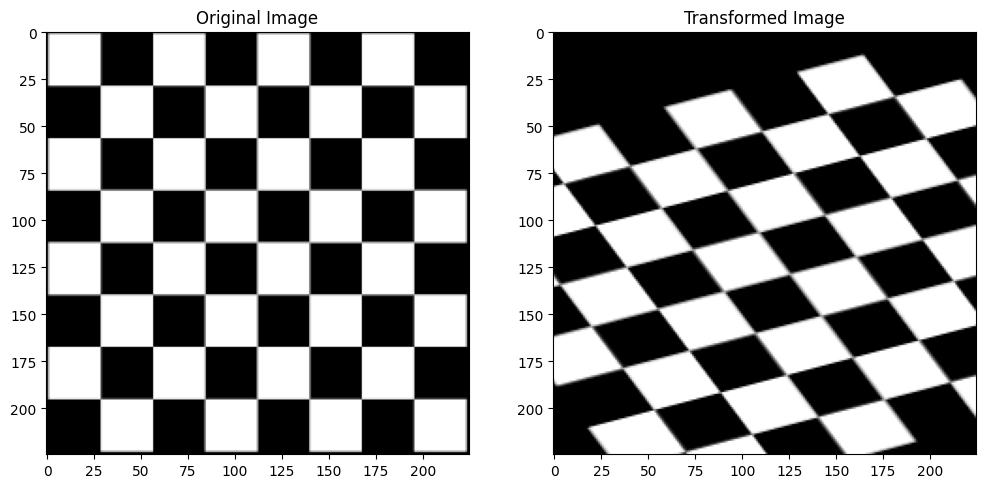

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(board)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(transformed_Image)
plt.title('Transformed Image')
plt.show()

# Scaling OR Resizing

### Resizing to a particular height and width

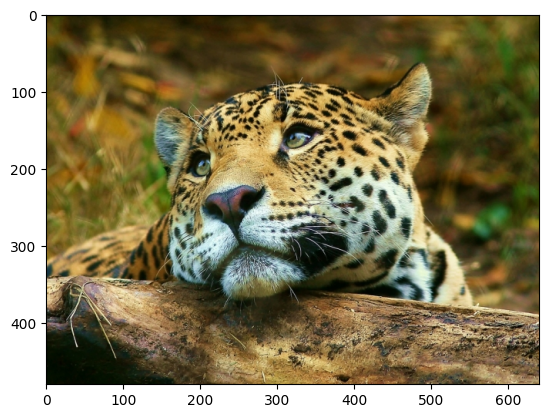

In [82]:
plt.imshow(img)
plt.show()

In [83]:
img.shape

(480, 640, 3)

In [84]:
img_rsize =cv2.resize(img,(600,400))      # Here the dimension are swapped.i.e 600 here corresponds to 640 and 400 
                                          # corresponds 480. So in cv2 and numpy, the dimensions are swapped.

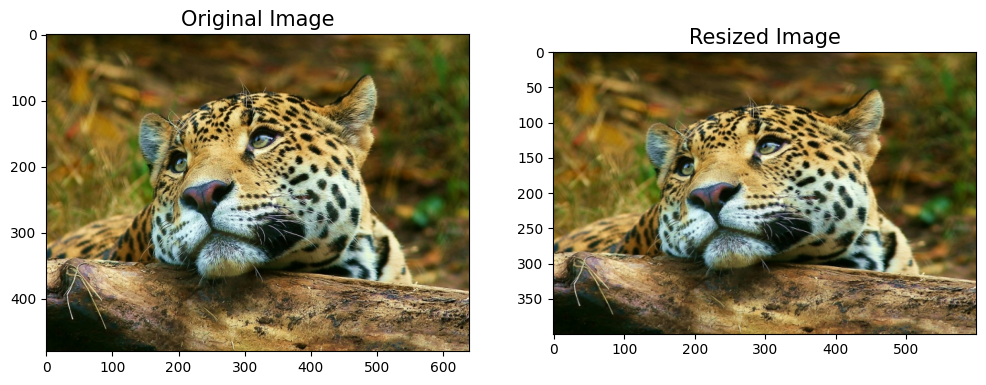

In [85]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_rsize)
plt.title("Resized Image", fontsize = 15)
plt.show()


### Zooming to a particular ratio

In [86]:
img_zoom = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

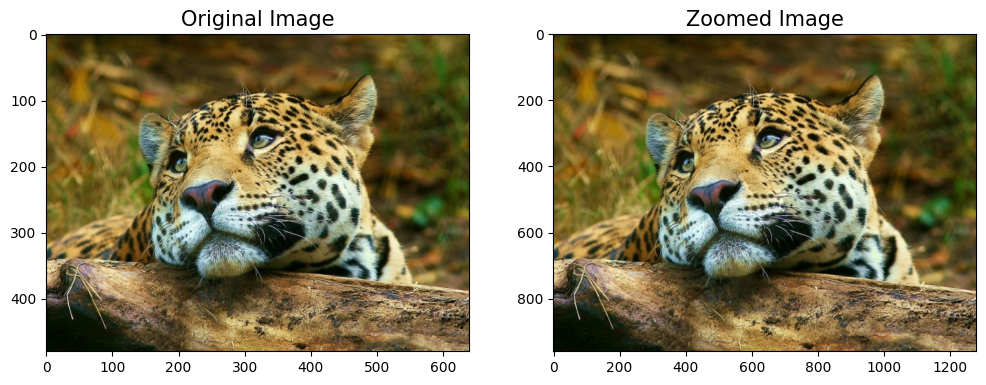

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_zoom)
plt.title("Zoomed Image", fontsize = 15)
plt.show()


### Shrinking to a Particular ratio

In [88]:
img_shrink = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)

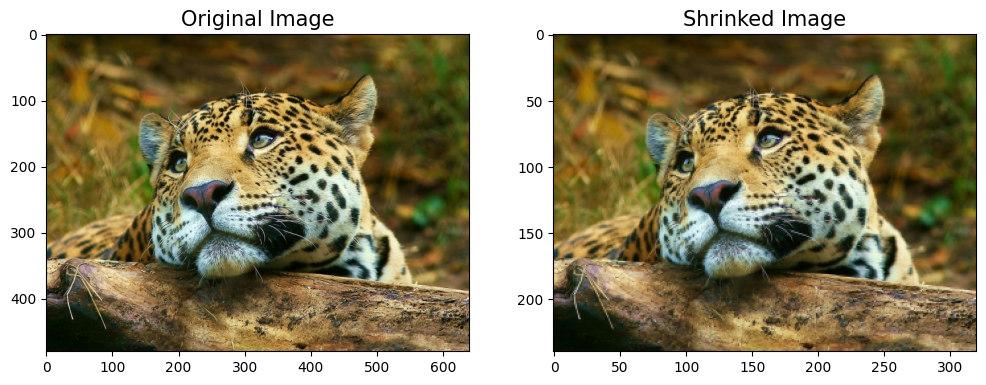

In [89]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_shrink)
plt.title("Shrinked Image", fontsize = 15)
plt.show()


# Cropping

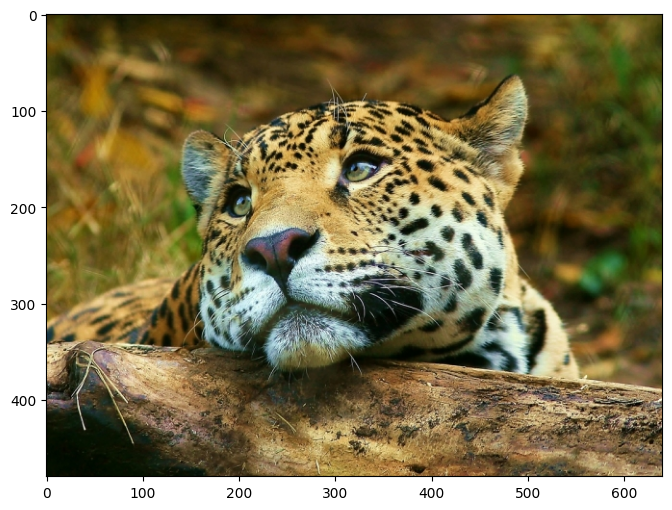

In [90]:
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.show()

In [91]:
# Get the starting coordinates from top left(0,0) and ending coordinates from bottom right (480,640)

 # x1 = starting row value from the top left (0,0)
 # y1 = starting col value from the top left (0,0)
 # x2 = ending row value from the bottom right (480,640)
 # y2 = ending col value from the bottom right (480,640)

# Image cropping means to slice the image

# img_Cropped = img[x1 : x2 , y1 : y2]


In [92]:
x1 = 50
x2 = 380
y1 = 140
y2 = 500

In [93]:
img_copy = img.copy()
img_copy = cv2.rectangle(img_copy, (y1, x1), (y2, x2), (0, 255, 255), 5)

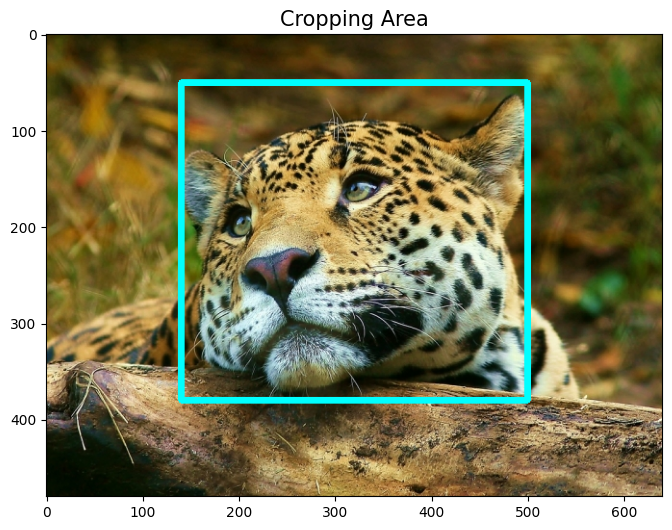

In [94]:
plt.figure(figsize=(12,6))
plt.imshow(img_copy)
plt.title("Cropping Area", fontsize = 15)
plt.show()

In [95]:
img_Cropped = img[x1 : x2 , y1 : y2]

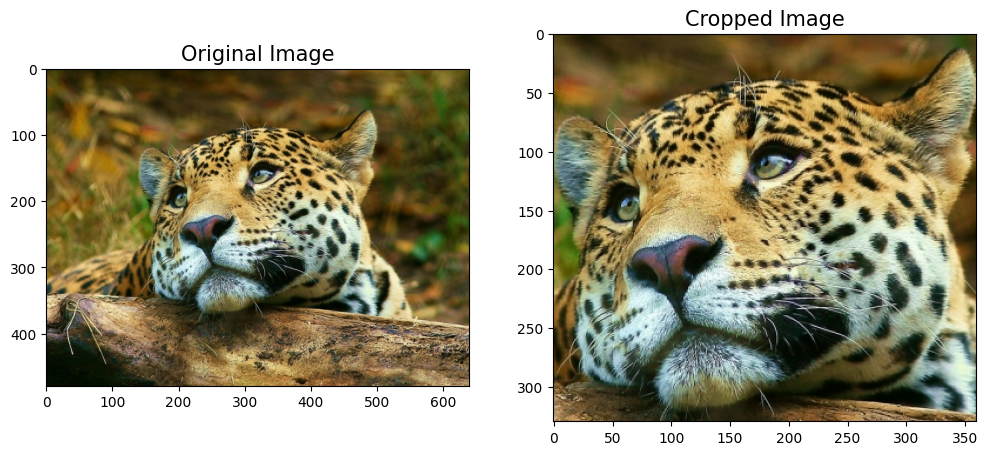

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', fontsize = 15)
plt.subplot(122)
plt.imshow(img_Cropped)
plt.title("Cropped Image", fontsize = 15)
plt.show()